In [3]:
# NYC Taxi Trip Duration - EDA in Jupyter Notebook

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
df = pd.read_csv("Downloads/nyc_taxi_trip_duration.csv")  # make sure this file is in the same folder

In [7]:
#  Check for nulls and data types
print("Null Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

#  Summary statistics
print("\nSummary Statistics:\n", df.describe())
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue Counts for {col}:\n", df[col].value_counts().head())


Null Values:
 id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     1
dropoff_latitude      1
store_and_fwd_flag    1
trip_duration         1
dtype: int64

Data Types:
 id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration         float64
dtype: object

Summary Statistics:
          vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  7833.000000      7833.000000       7833.000000      7833.000000   
mean      1.546279         1.702924        -73.973453        40.751219   
std       0.497885         1.350184          0.038167         0.029082   
min       1.000000         0.0000

In [9]:
# Convert datetime columns and extract time features
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_day'] = df['pickup_datetime'].dt.day

df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday
df['dropoff_day'] = df['dropoff_datetime'].dt.day


In [11]:
# Log-transform trip duration to reduce skewness
df['log_trip_duration'] = np.log1p(df['trip_duration'])

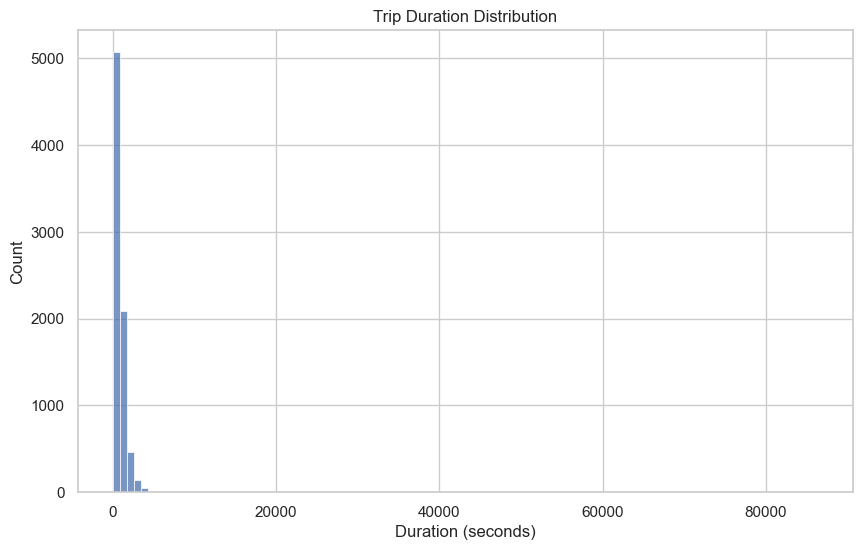

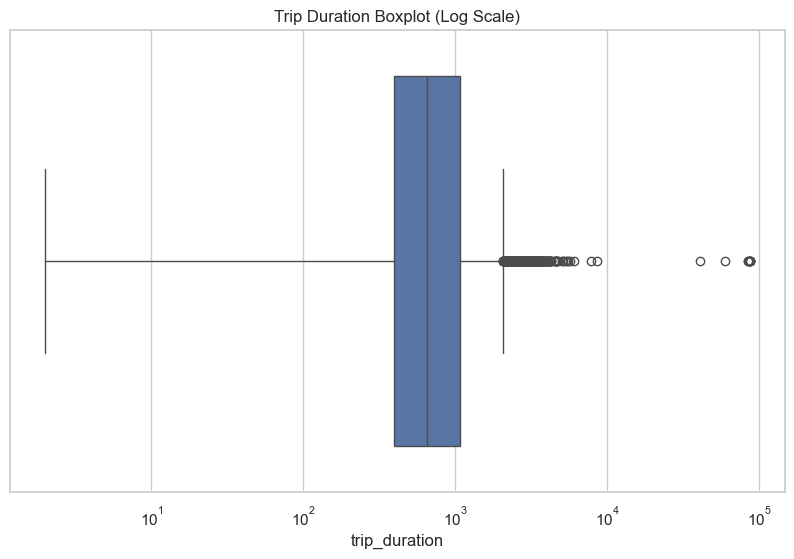

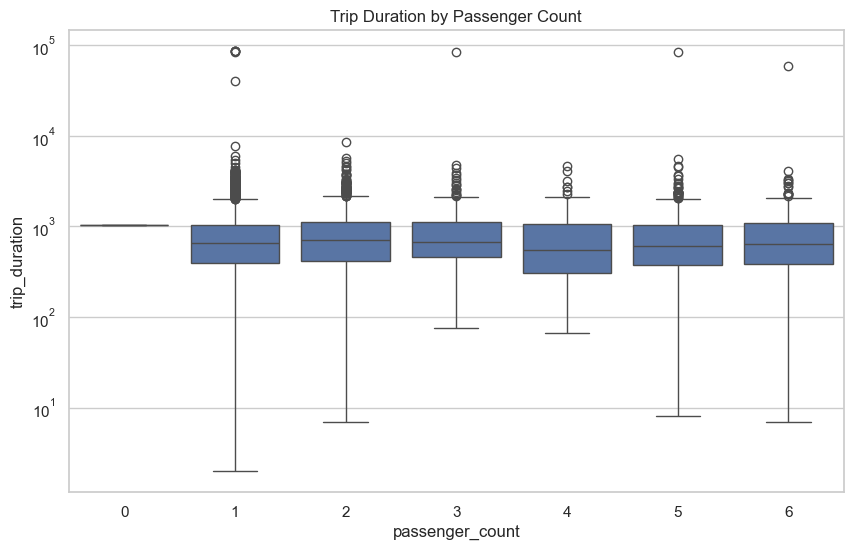

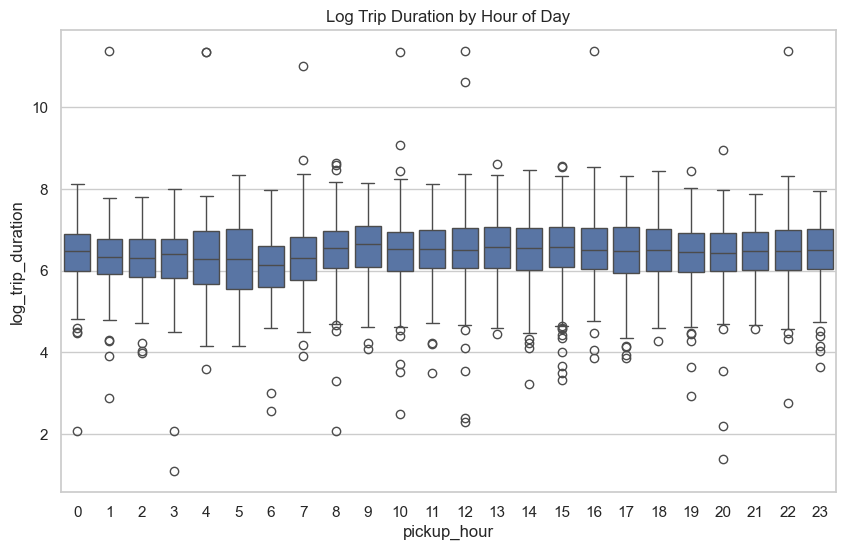

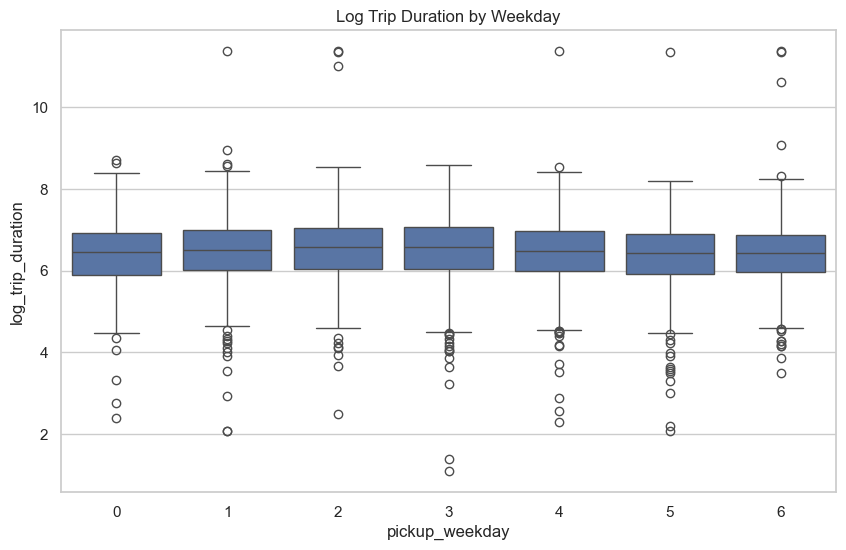

In [13]:
# Step 7: Histograms and boxplots

# Histogram of trip duration
sns.histplot(df['trip_duration'], bins=100)
plt.title("Trip Duration Distribution")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.show()

# Boxplot of trip duration
sns.boxplot(x=df['trip_duration'])
plt.xscale("log")
plt.title("Trip Duration Boxplot (Log Scale)")
plt.show()

# Passenger count vs trip duration
sns.boxplot(x='passenger_count', y='trip_duration', data=df)
plt.yscale("log")
plt.title("Trip Duration by Passenger Count")
plt.show()

# Trip duration by pickup hour
sns.boxplot(x='pickup_hour', y='log_trip_duration', data=df)
plt.title("Log Trip Duration by Hour of Day")
plt.show()

# Trip duration by pickup weekday
sns.boxplot(x='pickup_weekday', y='log_trip_duration', data=df)
plt.title("Log Trip Duration by Weekday")
plt.show()

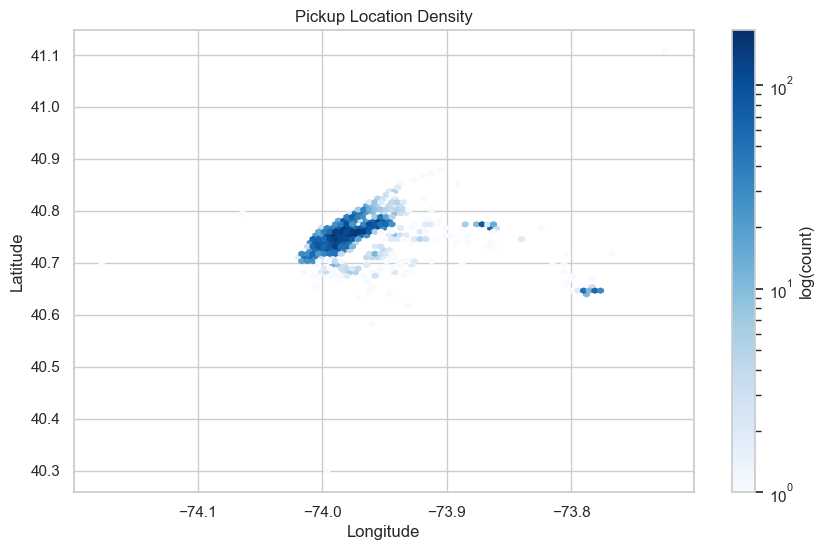

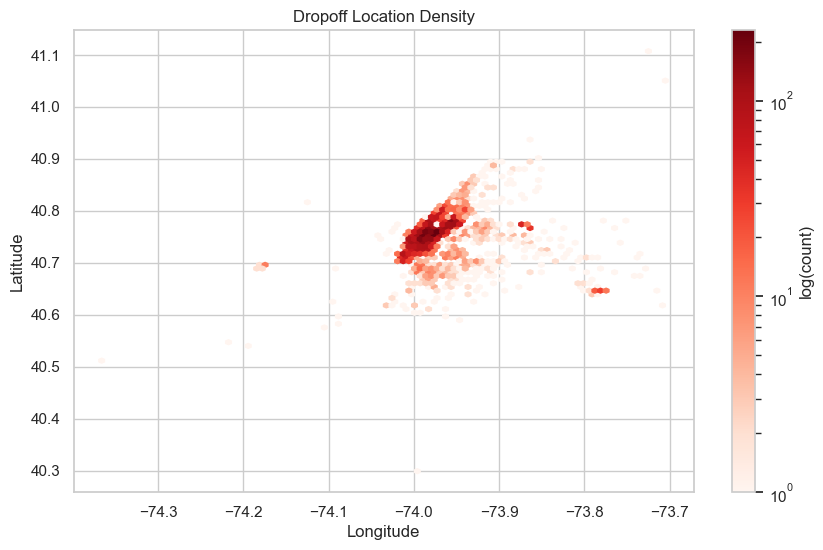

In [15]:
# Step 8: Pickup and Dropoff location clusters

# Pickup hotspots
plt.hexbin(df['pickup_longitude'], df['pickup_latitude'], gridsize=100, cmap='Blues', bins='log')
plt.title("Pickup Location Density")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="log(count)")
plt.show()

# Dropoff hotspots
plt.hexbin(df['dropoff_longitude'], df['dropoff_latitude'], gridsize=100, cmap='Reds', bins='log')
plt.title("Dropoff Location Density")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="log(count)")
plt.show()

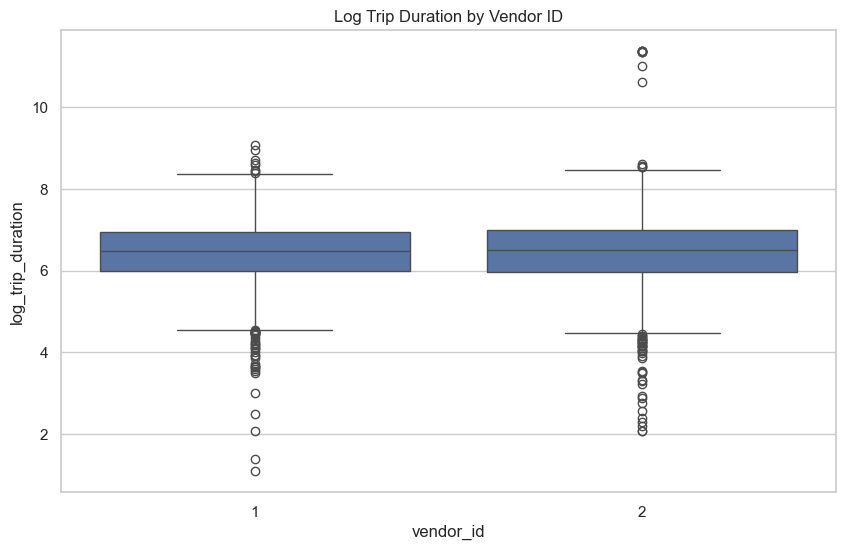

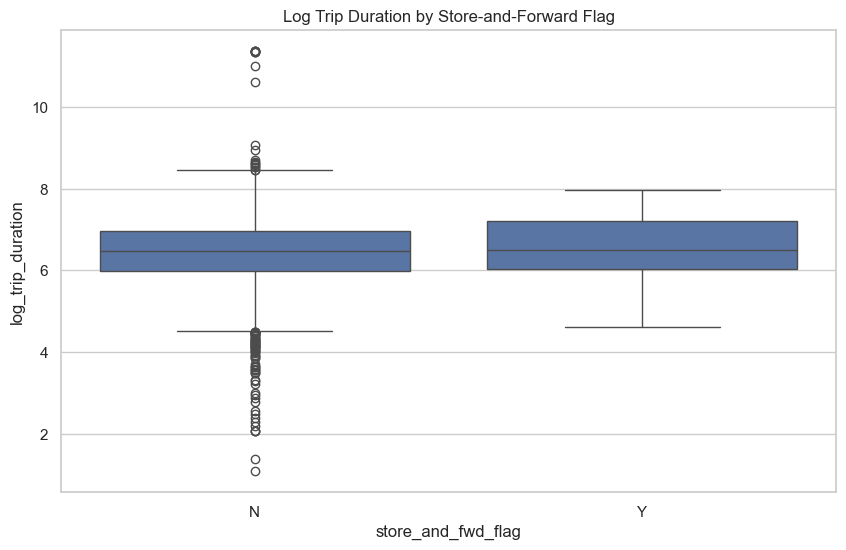

In [17]:
# Step 9: Other feature relationships

# Vendor ID
sns.boxplot(x='vendor_id', y='log_trip_duration', data=df)
plt.title("Log Trip Duration by Vendor ID")
plt.show()

# Store and forward flag
sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=df)
plt.title("Log Trip Duration by Store-and-Forward Flag")
plt.show()


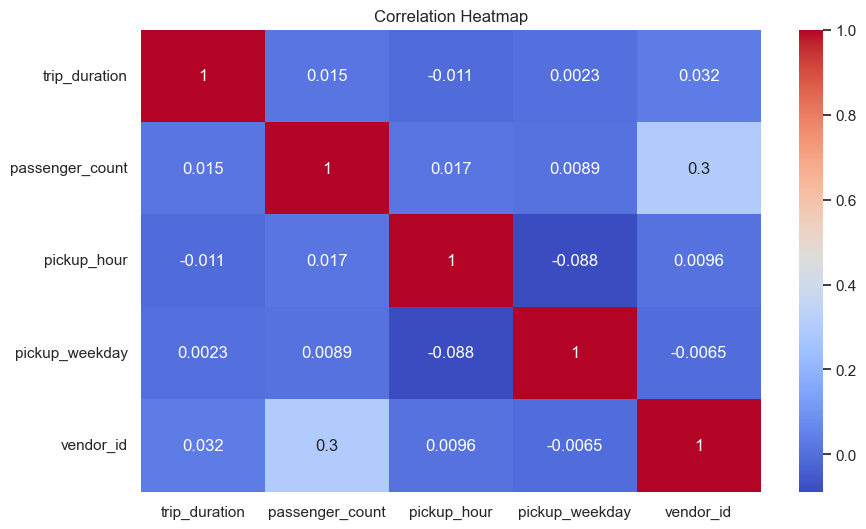


--- Summary ---
Skewness in trip duration: 28.18
Common pickup hours:
 pickup_hour
19    526
21    472
18    468
22    450
17    425
Name: count, dtype: int64
Frequent passenger counts:
 passenger_count
1    5441
2    1183
5     465
3     319
6     277
Name: count, dtype: int64


In [19]:
# Step 10: Correlation heatmap
corr = df[['trip_duration', 'passenger_count', 'pickup_hour', 'pickup_weekday', 'vendor_id']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 11: Key insights
print("\n--- Summary ---")
print(f"Skewness in trip duration: {df['trip_duration'].skew():.2f}")
print("Common pickup hours:\n", df['pickup_hour'].value_counts().head())
print("Frequent passenger counts:\n", df['passenger_count'].value_counts().head())